In [1]:
from pathlib import Path
import cv2
import numpy as np

In [2]:
from tqdm import tqdm_notebook as tqdm

In [3]:
from image_array import MovieImageArrayFile

In [4]:
from tracker_factory import tracker_symbols, factory

### 動画の読み込み 

In [5]:
movie_path = Path("sample_movie/sample_movie_1.mp4")
temp_path = Path("temp")
image_array = MovieImageArrayFile(movie_path, is_temp=False, temp_dir=temp_path)

In [6]:
image_array.read_movie(is_update=False)

### 最初の矩形 

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

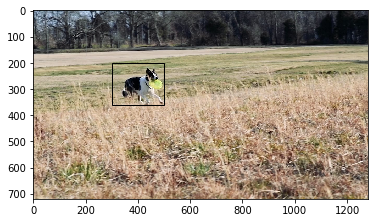

In [8]:
fig, ax = plt.subplots()

x1 = 300
y1 = 200
x2 = 500
y2 = 360

w = x2 - x1
h = y2 - y1

ax.imshow(image_array[0][:,:,::-1])
rectangle = patches.Rectangle((x1, y1),w,h, fill=False)
ax.add_patch(rectangle)

### 全てのトラッカーを比較

In [10]:
for tracker_symbol in tracker_symbols[2:]:
    tracker = factory(tracker_symbol)
    # 初期矩形をset
    x1 = 300
    y1 = 200
    x2 = 500
    y2 = 360

    xyxy_dict = {"x1":x1, "y1":y1, "x2":x2, "y2":y2}
    tracker.set_bbox(image_array[0], xyxy_dict)
    
    # 書き出す動画の設定
    width = image_array[0].shape[1]
    height = image_array[0].shape[0]
    video_path = Path("temp") / Path(tracker_symbol+".mp4")
    fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
    out = cv2.VideoWriter(str(video_path), fourcc, 30, (width, height))
    
    # 動画の書き出し
    for i, image in enumerate(tqdm(image_array)):
        if i > 0:
            out_dict = tracker.get_bbox(image)
            
            #矩形の描画
            if out_dict["bbox_dict"] is not None:
                x1,y1 = out_dict["bbox_dict"]["x1"], out_dict["bbox_dict"]["y1"]
                x2,y2 = out_dict["bbox_dict"]["x2"], out_dict["bbox_dict"]["y2"]
                image = cv2.rectangle(image, (x1,y1), (x2,y2), color=(0,0,0))
                
            #ポリゴンの描画
            if out_dict["polygon"] is not None:
                polygon_array = [[one_point["x"], one_point["y"]] for one_point in out_dict["polygon"]]
                image = cv2.fillConvexPoly(image, points=np.array(polygon_array), color=(0,0,0))
                
        out.write(image)
    out.release()
    print("finished",tracker_symbol)


finished SiamRPN



finished CSRT



finished KCF


error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-vijyisc5\opencv\modules\dnn\src\caffe\caffe_io.cpp:1121: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "goturn.prototxt" in function 'cv::dnn::ReadProtoFromTextFile'
